In [44]:
import numpy as np


maze = np.random.randint(0, 2, (6,6))
maze[0,0] = 2
maze[5,5] = 3

maze

array([[2, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 3]])

In [83]:
def direction2action(delta_x, delta_y):
    if (delta_x == 0):
        if (delta_y == 1):
            return 2
        elif (delta_y == 0):
            return 0
        elif (delta_y == -1):
            return 1
    elif (delta_x == 1 and delta_y == 0):
        return 4
    elif (delta_x == -1 and delta_y == 0):
        return 3
    raise Exception("Unknown direction")

def action2direction(action):
    a2d = [(0,0), (0, -1), (0, 1), (-1, 0), (1, 0)]
    return a2d[action]

maze[2,3] = 0
maze

array([[2, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 3]])

In [88]:
class BFS():
    def solve(self, maze):
        """
        param: maze: numpy.matrix
        return: history: [numpy.matrix, action]
        return: solvable: boolean
        """
        
        # reset param
        self._reset(maze)
        
        self.search_maze = maze.copy()
        self.visited = maze.copy()
        self.visited[np.where(self.visited==3)] = 0
        self.visited[np.where(self.visited==2)] = 0
        
        search = []
        history = []
        
        # start BFS
        search.append((0,0))
        self.visited[0,0] = 1
        
        while(len(search) > 0):
            x,y = search[0]
            search = search[1:]
            
            if (self.search_maze[y,x] == 3):
                self.search_maze[np.where(self.search_maze==2)] = 0
                hx, hy = x, y
                while True:
                    if (hx == 0 and hy == 0):
                        break
                    thisx, thisy = self.parent[hy, hx]
                    action = direction2action(hx-thisx, hy-thisy)
                    if (self.search_maze[hy, hx] == 2):
                        self.search_maze[hy, hx] = 0
                    self.search_maze[thisy, thisx] = 2
                    hx, hy = thisx, thisy
                    history.append((self.search_maze.copy(), action))
                break
            neibs = self._get_neighbour((x,y))
            for n in neibs:
                nx, ny = n
                self.visited[ny, nx] = 1
                self.parent[ny, nx] = (x,y)
                search.append(n)
        
        history.reverse()
        solvable = True
        if len(history) == 0:
            solvable = False
        return history, solvable    
            
        
    def _get_neighbour(self, pos):
        h, w = self.search_maze.shape
        x,y = pos
        delta_x = [0, 0, -1, 1]
        delta_y = [-1, 1, 0, 0]
        neibs = []
        
        for i in range(4):
            new_x = x + delta_x[i]
            new_y = y + delta_y[i]
            if (0<= new_x < w and 0 <= new_y < h and self.visited[new_y][new_x] == 0):
                neibs.append((new_x, new_y))
        return neibs
        
        
    def _reset(self, maze):
        self.parent = np.array([[(-1,-1) for i in range(6)] for i in range(6)])
        self.pos = (0,0)
        self.h, self.w = maze.shape

bfs = BFS()
bfs.solve(maze)

[[2 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 2 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 2 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 2 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 2 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 2 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 2 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 2 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 2 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 2 3]] 4


In [55]:
def BasicMiniGridEnv():
    def __init__(self, maze=None):
        """
        param: maze: numpy.matrix
        """
        self.maze = maze
        self.h, self.w = maze.shape

(1, 2)

In [4]:
import torch
import numpy as np

a = torch.tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]], dtype=torch.float32)
dl = torch.utils.data.DataLoader(dataset=a, batch_size=1, shuffle=True)
for i, d in enumerate(dl):
    print(i, ":", d.view(-1, 6))

print("End")
# print(torch.randn_like(a))

0 : tensor([[ 7.,  8.,  9., 10., 11., 12.]])
1 : tensor([[1., 2., 3., 4., 5., 6.]])
End


In [23]:
import numpy as np
a = np.matrix([[1,2],[3,4]])
list(np.where(a==3)) == (1,0)
print(np.random.rand

[ 0.00600482  0.77428366 -0.59321804  1.3945151 ]


In [28]:
a = np.array([1, 2, 3, 4]).reshape(-1,2)
print(a)
print(np.average(a, axis=1))

[[1 2]
 [3 4]]
[1.5 3.5]


In [39]:
import random
from collections import namedtuple
Transition = namedtuple("Transition", ("name", "value"))
a = [('a', 1), ('b', 2), ('c', 3), ('a', 4)]
a = [Transition(*i) for i in a]
print(*a)
a = zip(*a)
print(Transition(*a))

Transition(name='a', value=1) Transition(name='b', value=2) Transition(name='c', value=3) Transition(name='a', value=4)
Transition(name=('a', 'b', 'c', 'a'), value=(1, 2, 3, 4))


In [7]:
path = "/home/lemon/Workspace/2020Semester/UGVR/Bayesian_Grid/scripts/model/IL/Basic/BayesGridEnv"

import torch

checkpoint = torch.load(path)
print(checkpoint)

{'50': OrderedDict([('layer1.0.weight', tensor([[[[ 0.1961,  0.1484],
          [-0.3210,  0.3101]]],


        [[[-0.4234, -0.4564],
          [-0.3664, -0.1178]]],


        [[[ 0.1565, -0.2203],
          [-0.2472,  0.3369]]],


        [[[ 0.0905,  0.3925],
          [-0.2911, -0.0742]]],


        [[[-0.1526,  0.2178],
          [ 0.1267, -0.2874]]],


        [[[ 0.4791,  0.4099],
          [ 0.0011, -0.1105]]],


        [[[ 0.3024, -0.1040],
          [-0.0437,  0.0082]]],


        [[[-0.3899,  0.1163],
          [ 0.5096, -0.0938]]]], device='cuda:0')), ('layer1.0.bias', tensor([-0.4646,  0.1199,  0.4408,  0.2311, -0.0521,  0.1181, -0.4170,  0.0658],
       device='cuda:0')), ('layer1.1.weight', tensor([0.9669, 0.9623, 1.0546, 0.9974, 1.0103, 0.9813, 1.0190, 0.9882],
       device='cuda:0')), ('layer1.1.bias', tensor([-0.0230, -0.0372,  0.0162, -0.0318, -0.0123, -0.0436, -0.0463, -0.0323],
       device='cuda:0')), ('layer1.1.running_mean', tensor([-0.3769, -0.2391,  0.4476, 

In [30]:
import numpy as np
a = np.array([[1,2], [2,3], [3,4]]).T
print(a)

[[1 2 3]
 [2 3 4]]


In [31]:
class Parent(object):
    def __init__(self):
        self.me()
    def me(self):
        print("Parent")

class Child(Parent):
    def __init__(self):
        super(Child, self).__init__()
    def me(self):
        print("Child")
c = Child()

Child


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class HardMazeDiscriminator(object):
    def __init__(self):
        super(HardMazeDiscriminator, self).__init__()
        

class AgentPerformanceDiscrininator(object):
    


[True, True]

In [30]:
a = torch.tensor(10*np.ones(10)).float()
a = F.softmax(a, dim=0)
a = F.kl_div(a,a,reduction="batchmean")
a

tensor(-0.2403)

In [36]:
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
ind = np.argpartition(a, 4)[-4:]
a[ind]
print(a[0])

np.mean(a)

9


4.2

In [54]:
import pandas as pd

data = [["a", 1], ["b", 2], ["c", 3]]
data =pd.DataFrame(data, columns=["name", "value"])
value = list(data.loc[data["name"]=="a", "value"])
value = [0]
data.loc[data["name"]=="a", "value"] = value
data

,name,value
0,a,0
1,b,2
2,c,3


[0.34809528 0.46119352 0.56537426 0.62673996 0.68288112 0.65124652
 0.72368556 0.61950482 0.4124086  0.        ]
[0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0. ]


Text(0,0.5,'Distance to goal')

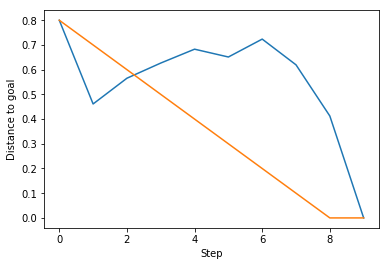

In [105]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

def smooth(data, sm=1):
    if sm > 1:
        y = np.ones(sm)*1.0/sm
        data = np.convolve(y, data, "same")
    return data

y1 = np.random.rand(9)
y1 += abs(min(y1))
y1 = smooth(y1, sm=5)
y1 = np.append(y1, 0)
print(y1)
y2 = sorted(np.arange(9), reverse=True)
# y2 = smooth(y2, sm=2)
y2 = np.append(y2, 0)
y2 = np.array(y2) / 10
y3 = np.random.rand(10)
print(y2)
y1[0] = 0.8
plt.plot(np.arange(len(y1)), y1)
plt.plot(np.arange(len(y1)), y2)
plt.xlabel("Step")
plt.ylabel("Distance to goal")
